In [209]:
import pandas as pd
import numpy as np

In [210]:
eastbay = pd.read_csv('Master_file.csv')
eastbay.head()

,PRICE,PROPERTY_TYPE,ADDRESS,LOCATION,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH
0,753000.0,Townhouse,641 Centre Ct,Harbor Bay,3.0,2.5,1720.0,61855.0,1985.0,238.0,438.0,581.0
1,1220000.0,Single Family Residential,201 Capetown Dr,Alameda,4.0,2.5,2315.0,4936.0,1984.0,265.0,527.0,222.0
2,1325000.0,Single Family Residential,419 Dewitt Ln,Alameda Point,5.0,3.5,3336.0,3065.0,2016.0,76.0,397.0,150.0
3,1285000.0,Single Family Residential,238 Hollister Ave,Bay Port,4.0,3.0,2361.0,3462.0,2005.0,257.0,544.0,142.0
4,895000.0,Condo/Co-op,2737 5th St,Alameda,3.0,3.5,1987.0,NaN,2016.0,39.0,450.0,300.0


In [211]:
eastbay.info()
eastbay.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 12 columns):
PRICE             1049 non-null float64
PROPERTY_TYPE     1050 non-null object
ADDRESS           1048 non-null object
LOCATION          951 non-null object
BEDS              1020 non-null float64
BATHS             1017 non-null float64
SQUARE FEET       1021 non-null float64
LOT SIZE          914 non-null float64
YEAR BUILT        1014 non-null float64
DAYS ON MARKET    951 non-null float64
$/SQUARE FEET     1020 non-null float64
HOA/MONTH         300 non-null float64
dtypes: float64(9), object(3)
memory usage: 98.5+ KB


,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH
count,1.049000e+03,1020.000000,1017.000000,1021.000000,914.000000,1014.000000,951.000000,1020.000000,300.000000
mean,1.074497e+06,3.048039,2.228614,1828.637610,8828.964989,1946.005917,206.497371,645.848039,342.163333
std,5.660557e+05,1.883935,1.914826,1295.366349,27148.100899,33.586592,90.153295,215.219566,189.407958
min,3.250000e+04,0.000000,1.000000,426.000000,5.000000,1877.000000,4.000000,68.000000,0.000000
25%,7.250000e+05,2.000000,1.000000,1150.000000,3638.500000,1921.000000,138.000000,511.000000,191.500000
50%,9.600000e+05,3.000000,2.000000,1557.000000,4800.000000,1939.000000,209.000000,624.000000,350.000000
75%,1.307000e+06,4.000000,2.500000,2146.000000,6300.000000,1971.000000,284.000000,769.000000,450.000000
max,6.413000e+06,30.000000,37.000000,21214.000000,403366.000000,2018.000000,364.000000,2550.000000,1404.000000


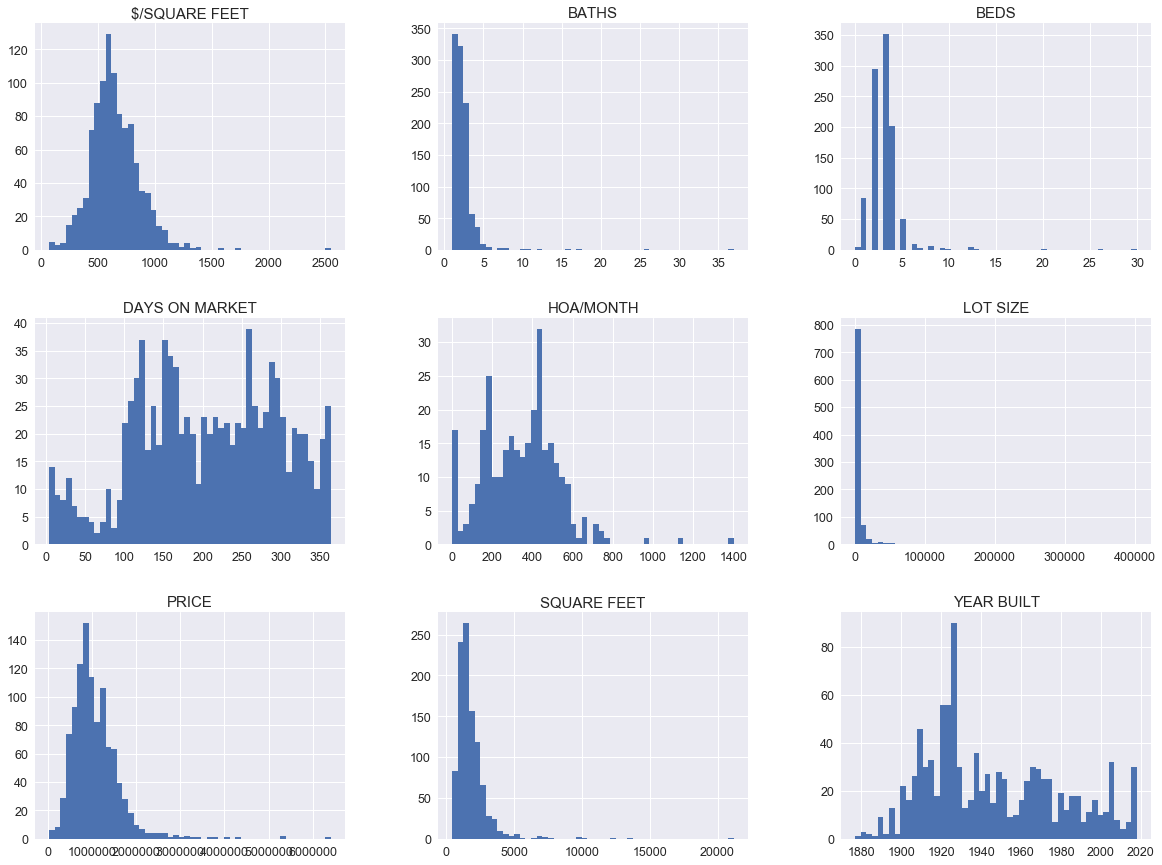

In [212]:
%matplotlib inline

import matplotlib.pyplot as plt

eastbay.hist(bins=50, figsize=(20,15))

plt.savefig("attribute_historgram_plots")

plt.show()

In [213]:
corr_matrix = eastbay.corr()
corr_matrix["PRICE"].sort_values(ascending=False)

PRICE             1.000000
SQUARE FEET       0.761169
BATHS             0.640044
BEDS              0.591052
$/SQUARE FEET     0.191574
DAYS ON MARKET    0.010668
LOT SIZE         -0.049435
YEAR BUILT       -0.112522
HOA/MONTH        -0.423179
Name: PRICE, dtype: float64

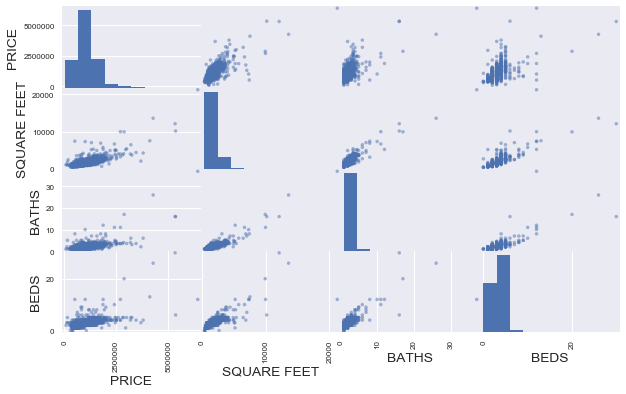

In [214]:
from pandas.plotting import scatter_matrix
attributes= ["PRICE","SQUARE FEET","BATHS","BEDS"]
scatter_matrix(eastbay[attributes],figsize=(10,6))
plt.savefig('matrix.png')

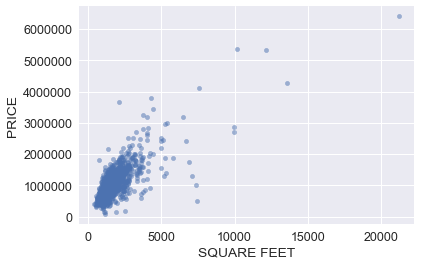

In [215]:
eastbay.plot(kind="scatter", x="SQUARE FEET", y ="PRICE", alpha=0.5)
plt.savefig('scatter.png')

In [216]:
len(eastbay)

1050

In [217]:
eastbay = eastbay.drop(eastbay[eastbay['PROPERTY_TYPE'] == "Vacant Land"].index)
eastbay.head()

,PRICE,PROPERTY_TYPE,ADDRESS,LOCATION,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH
0,753000.0,Townhouse,641 Centre Ct,Harbor Bay,3.0,2.5,1720.0,61855.0,1985.0,238.0,438.0,581.0
1,1220000.0,Single Family Residential,201 Capetown Dr,Alameda,4.0,2.5,2315.0,4936.0,1984.0,265.0,527.0,222.0
2,1325000.0,Single Family Residential,419 Dewitt Ln,Alameda Point,5.0,3.5,3336.0,3065.0,2016.0,76.0,397.0,150.0
3,1285000.0,Single Family Residential,238 Hollister Ave,Bay Port,4.0,3.0,2361.0,3462.0,2005.0,257.0,544.0,142.0
4,895000.0,Condo/Co-op,2737 5th St,Alameda,3.0,3.5,1987.0,NaN,2016.0,39.0,450.0,300.0


In [218]:
eastbay.drop(eastbay.columns[[2,3,11]], axis=1, inplace=True)
eastbay.head()

,PRICE,PROPERTY_TYPE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET
0,753000.0,Townhouse,3.0,2.5,1720.0,61855.0,1985.0,238.0,438.0
1,1220000.0,Single Family Residential,4.0,2.5,2315.0,4936.0,1984.0,265.0,527.0
2,1325000.0,Single Family Residential,5.0,3.5,3336.0,3065.0,2016.0,76.0,397.0
3,1285000.0,Single Family Residential,4.0,3.0,2361.0,3462.0,2005.0,257.0,544.0
4,895000.0,Condo/Co-op,3.0,3.5,1987.0,NaN,2016.0,39.0,450.0


In [219]:
eastbay= eastbay.dropna()

In [220]:
eastbay.isnull().sum()

PRICE             0
PROPERTY_TYPE     0
BEDS              0
BATHS             0
SQUARE FEET       0
LOT SIZE          0
YEAR BUILT        0
DAYS ON MARKET    0
$/SQUARE FEET     0
dtype: int64

In [221]:
len(eastbay)

812

In [222]:
X = eastbay[['PROPERTY_TYPE','BEDS','BATHS','SQUARE FEET','LOT SIZE','YEAR BUILT','DAYS ON MARKET','$/SQUARE FEET']]
Y = eastbay['PRICE']
n = pd.get_dummies(eastbay.PROPERTY_TYPE)
X = pd.concat([X, n], axis=1)

drops = ['PROPERTY_TYPE']
X.drop(drops, inplace=True, axis=1)
X.head()

,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,Condo/Co-op,Multi-Family (2-4 Unit),Single Family Residential,Townhouse
0,3.0,2.5,1720.0,61855.0,1985.0,238.0,438.0,0,0,0,1
1,4.0,2.5,2315.0,4936.0,1984.0,265.0,527.0,0,0,1,0
2,5.0,3.5,3336.0,3065.0,2016.0,76.0,397.0,0,0,1,0
3,4.0,3.0,2361.0,3462.0,2005.0,257.0,544.0,0,0,1,0
5,3.0,1.0,1072.0,3250.0,1914.0,169.0,700.0,0,0,1,0


In [223]:
Y_mean = Y.mean()

In [224]:
corrmat = eastbay.corr()
k=8
cols = corrmat.nlargest(k, 'PRICE')['PRICE'].index
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr



,Most Correlated Features
0,PRICE
1,SQUARE FEET
2,BATHS
3,BEDS
4,$/SQUARE FEET
5,DAYS ON MARKET
6,YEAR BUILT
7,LOT SIZE


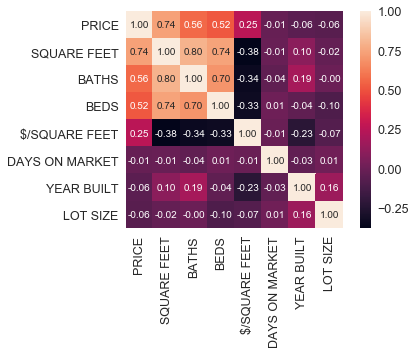

In [225]:
import seaborn as sns
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'PRICE')['PRICE'].index
cm = np.corrcoef(eastbay[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [227]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.05858883,  0.39218487, -0.0844128 , ..., -0.27991651,
        -1.95789002,  3.86284463],
       [ 0.8063954 ,  0.39218487,  0.6306429 , ..., -0.27991651,
         0.51075392, -0.25887658],
       [ 1.67137962,  1.43118686,  1.85765446, ..., -0.27991651,
         0.51075392, -0.25887658],
       ...,
       [ 1.67137962,  0.91168586,  0.62823935, ...,  3.57249379,
        -1.95789002, -0.25887658],
       [-0.05858883, -0.12731613, -0.1781512 , ..., -0.27991651,
         0.51075392, -0.25887658],
       [-0.05858883,  0.39218487,  0.29054078, ..., -0.27991651,
        -1.95789002,  3.86284463]])

In [203]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=55)

In [82]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test,y_test)

0.89271471898302

In [83]:
from sklearn.linear_model import LassoCV

regressor1 = LassoCV (cv = 5, random_state=0).fit(X_test,y_test)
regressor1.score(X_test,y_test)


0.910055710177011

In [84]:
from sklearn.linear_model import RidgeCV
regressor2 = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_test, y_test)
regressor2.score(X_test, y_test) 

0.9119090413729471

In [85]:
y_pred = regressor.predict(X_test)
print('Liner Regression R squared: %.4f' % regressor.score(X_test, y_test))

Liner Regression R squared: 0.8927


In [86]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse) 

print('Liner Regression RMSE: %.4f' % lin_rmse)


Liner Regression RMSE: 156666.4290


In [87]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(y_pred, y_test)
print('Liner Regression MAE: %.4f' % lin_mae)

Liner Regression MAE: 97655.8856


In [128]:
x1= [i[0] for i in X_test]

In [143]:
y_tru = np.asarray(y_test)
y_predict = np.round(y_pred)
x_tru = np.asarray(x1)


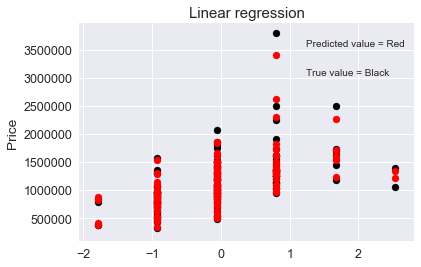

In [182]:
plt.scatter(x_tru,y_test,  color='black')
plt.scatter(x_tru,y_predict, color='red')
plt.title('Linear regression')
plt.ylabel('Price')
plt.figtext(.65, .8 ,"Predicted value = Red",fontsize=10)
plt.figtext(.65, .7, "True value = Black",fontsize=10)
plt.show()


In [139]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared": 0.9381


In [140]:
y_pred = forest_reg.predict(X_test)

forest_mse = mean_squared_error(y_pred, y_test)

forest_rmse = np.sqrt(forest_mse)

print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 118956.3070


In [209]:
y_tru = np.asarray(y_test)
y_pre = np.round(y_pred)
MAPE =mean_absolute_percentage_error(y_tru,y_pre)
MAPE

0.044932921440299915

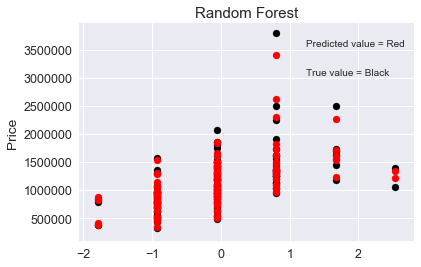

In [183]:
y_predict = np.round(y_pred)
plt.scatter(x_tru,y_test,  color='black')
plt.scatter(x_tru,y_predict, color='red')
plt.title('Random Forest')
plt.ylabel('Price')
plt.figtext(.65, .8 ,"Predicted value = Red",fontsize=10)
plt.figtext(.65, .7, "True value = Black",fontsize=10)
plt.show()


In [146]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)
print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))


Gradient Boosting R squared": 0.9759


In [147]:
y_pred = model.predict(X_test)

model_mse = mean_squared_error(y_pred, y_test)

model_rmse = np.sqrt(model_mse)

print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 74268.9805


In [148]:
y_tru = np.asarray(y_test)
y_pre = np.round(y_pred)
MAPE =mean_absolute_percentage_error(y_tru,y_pre)
MAPE

0.03728367352615958

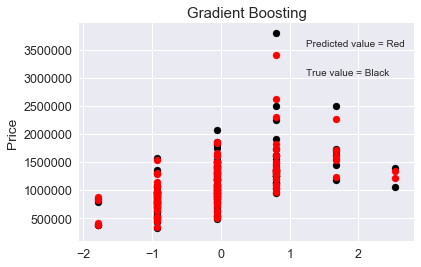

In [184]:
y_predict = np.round(y_pred)
plt.scatter(x_tru,y_test,  color='black')
plt.scatter(x_tru,y_predict, color='red')
plt.title('Gradient Boosting')
plt.ylabel('Price')
plt.figtext(.65, .8 ,"Predicted value = Red",fontsize=10)
plt.figtext(.65, .7, "True value = Black",fontsize=10)
plt.show()